# Regularized Linear Regression: A Jupyter Notebook Demonstration

## Introduction

Welcome to this Jupyter Notebook, where I showcase my skills in implementing regularized linear regression techniques, including Ridge, Lasso, and Elastic Net regression. Regularization is a powerful approach to prevent overfitting, improve model generalization, and handle high-dimensional datasets effectively. In this notebook, I aim to demonstrate my ability to:

- Prepare and preprocess data for regression modeling.
- Implement linear regression with regularization using Python libraries like `scikit-learn`.
- Compare the performance of standard linear regression with Ridge, Lasso, and Elastic Net models.
- Visualize the impact of regularization on model coefficients and predictions.
- Evaluate model performance using appropriate metrics (e.g., MSE, R²).

This notebook is designed to highlight my understanding of machine learning concepts, proficiency in Python programming, and ability to interpret and communicate results effectively. The dataset used in this demonstration is [insert dataset name, e.g., a synthetic dataset or a real-world dataset like the Boston Housing dataset], which provides a practical context for exploring regularization techniques.

Let’s dive into the code and explore how regularization enhances linear regression models!

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# ## Loading the data

First, we will load the data to be used in this notebook that corresponds to the "diabetes" database of the "sklearn" package. To do this, we will execute the following code:

In [2]:
XTotal, yTotal = datasets.load_diabetes(return_X_y=True)

Then, we will start the database in a train section and another test as follows: we will use 67% of the training data and the remaining 33% for evaluation.

In [3]:
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

Now, we will proceed to discuss the three penalty models discussed above and the codes to implement them.

# ## Model with Ridge type penalty

This model uses the standard of the Betas vector as the sum of the square of its components, that is, the classic Euclidean standard of a vector. In this way, the optimization problem that is sought to be solved is:

$$ \ hat \ beta = argmin \ sum_ {i = 1}^{n} (y_- \ beta^tx_i)^2 + \ lambda \ sum_ {j = 1}^{k} \ beta_j^{2} $$

Below is the code to calibrate the model with a ridge penalty using Cross-Validation:

In [4]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloRidge = RidgeCV(alphas=alphasCalibrar,store_cv_values=True).fit(XTrain, yTrain)

Once the model is calibrated, we can know the value of $ \ Lambda $, of $ r^{2} $ of regression and the estimated coefficients using the following commands:

In [5]:
print('El parámetro de penalización óptimo es:')
print(modeloRidge.alpha_)
print('El valor del R^2 es:')
print(modeloRidge.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloRidge.coef_)

El parámetro de penalización óptimo es:
0.04824108704165374
El valor del R^2 es:
0.5555050169726373
Los coeficientes estimados son:
[ -30.74688277 -173.94282028  562.75782213  272.05180796  -99.66001003
  -78.00254663 -208.36004921   51.25040253  532.18392394   51.71663159]


To observe what happens with the coefficients as the value of the penalty parameter changes, the following code must be run:

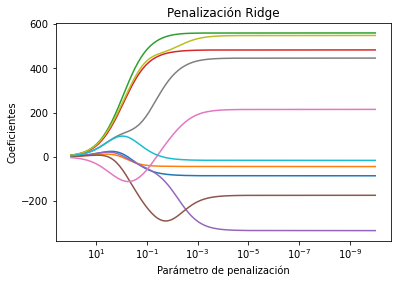

In [6]:
coefs = []
for a in alphasCalibrar:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(XTrain, yTrain)
    coefs.append(ridge.coef_)

# Presentation of results

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Ridge')
plt.axis('tight')
plt.show()

Finally, we can make predictions on the evaluation sample and calculate the MSE corresponding to the command that is immediately shown:

In [7]:
prediccionRidge=modeloRidge.predict(XTest)
MSERidge=np.average(np.square(prediccionRidge-yTest))
print('MSE regresión con penalización tipo Ridge:')
print(MSERidge)

MSE regresión con penalización tipo Ridge:
3116.3470058003163


# ## Model with Lasso type penalty

This model uses the standard of the betas vector as the sum of the absolute value of its components, that is, the optimization problem that is sought to be solved is:

$$ \ hat \ beta = argmin \ sum_ {i = 1}^{n} (y_- \ beta^tx_i)^2 + \ lambda \ sum_ {j = 1}^{k} | \ beta_j | $$

Below is the code to calibrate the model with Lasso penalty using Cross-Validation:

In [8]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)

Once the model is calibrated, we can know the value of $ \ Lambda $, of $ r^{2} $ of regression and the estimated coefficients using the following commands:

In [9]:
print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

El parámetro de penalización es:
0.04824108704165374
El valor del R^2 es:
0.5560271023727925
Los coeficientes estimados son:
[  -7.84287066 -151.6588139   590.8063923   251.03733442 -158.75797546
   -0.         -193.40634314    0.          596.76793272   14.73853109]


To observe what happens with the coefficients as the value of the penalty parameter changes, the following code must be run:

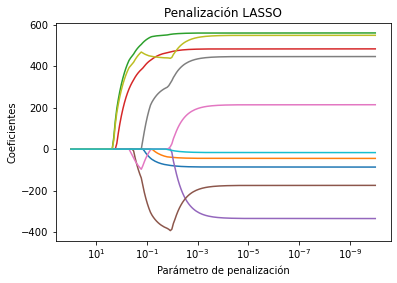

In [10]:
coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False,max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

# Presentation of results

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

Finally, we can make predictions on the evaluation sample and calculate the MSE corresponding to the command that is immediately shown:

In [11]:
prediccionLASSO=modeloLASSO.predict(XTest)
MSELASSO=np.average(np.square(prediccionLASSO-yTest))
print('MSE regresión con penalización tipo LASSO:')
print(MSELASSO)

MSE regresión con penalización tipo LASSO:
3158.1726904665447


# ## Model with Elastic Net type penalty

This model combines the classic Euclidean standard of the Betas vector together with the standard of the Betas vector as the sum of the absolute value of its components, that is, it is a combination between the Ridge type penalty and the Lasso type penalty.
In this way, the optimization problem that is sought to be solved is:

$$ \ hat \ beta = argmin \ sum_ {i = 1}^{n} (y_ {i}-\ beta^tx_i)^2 + \ lambda ((1- \ alpha) \ sum_ {j = 1}^{k} \ beta_j^{2} + \ alpha \ sum_ {j = 1}^{k} | \ beta_j |) $$

As can be seen, for this type of penalty there are two calibration parameters $ \ Lambda $ and $ \ Alpha $. In addition, it is important to note that if we have $ \ alpha = $ 0 we would be talking about a model with a ridge type penalty, and if we have $ \ alpha = $ 1 we would be talking about a model with lasso type penalty.

Below is the code to calibrate the model with elastic net penalty using Cross-Validation:

In [12]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloElastic = ElasticNetCV(alphas=alphasCalibrar,cv=5, random_state=0).fit(XTrain,yTrain)

Once the model is calibrated, we can know the value of $ \ Lambda $, of $ r^{2} $ of regression and the estimated coefficients using the following commands:

In [13]:
print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)

El parámetro de penalización es:
0.0004937047852839004
El valor del R^2 es:
0.5538625583085408
Los coeficientes estimados son:
[ -26.9569002  -167.54484824  546.83904689  268.2522041   -74.76095447
  -92.30768544 -209.00556072   62.2106805   504.47407276   58.48911283]


To observe what happens with the coefficients as the value of the penalty parameter changes, the following code must be run:

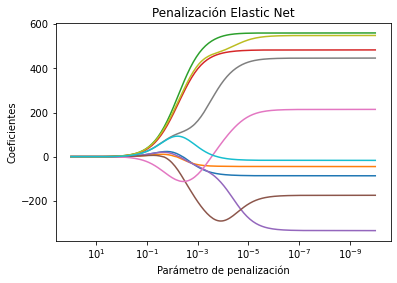

In [14]:
coefs = []
for a in alphasCalibrar:
    elasticNet = ElasticNet(alpha=a, fit_intercept=False,max_iter=10000)
    elasticNet.fit(XTrain, yTrain)
    coefs.append(elasticNet.coef_)

# Presentation of results

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Elastic Net')
plt.axis('tight')
plt.show()

Finally, we can make predictions on the evaluation sample and calculate the MSE corresponding to the command that is immediately shown:

In [15]:
prediccionElastic=modeloElastic.predict(XTest)
MSEElastic=np.average(np.square(prediccionElastic-yTest))
print('MSE regresión con penalización tipo Elastic Net:')
print(MSEElastic)

MSE regresión con penalización tipo Elastic Net:
3098.8249623929796


# ## Comparison of models

Finally, there is a code that jointly graph the MSE in test of the three models.

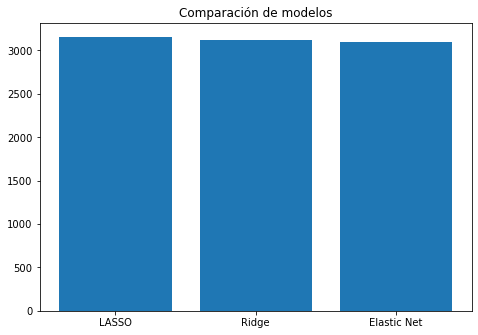

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['LASSO', 'Ridge','Elastic Net']
ejeY = [MSELASSO,MSERidge,MSEElastic]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

As can be seen, for this particular case, the performance of the Elastic Net model was better than that of Ridge and Lasso.

# ## Code implementation

Next, you must write a function that receives as parameters the matrix of training predictors, the training response variable, the evaluation predictors matrix, the evaluation response variable and a parameter called "penalty" that is 1 if you want to estimate a model with lasso type penalty, 2 if you want to estimate a model with a ridge type penalty The requested model with training data and calculate predictions for the evaluation set. Finally, the MSE of the model in test must be returned.

In [3]:
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split

def estimate_regression_model(X_train, y_train, X_test, y_test, penalization):
    """
    Function to estimate regression models with different penalization types
    
    Parameters:
    X_train: Training predictor matrix
    y_train: Training response variable
    X_test: Test predictor matrix
    y_test: Test response variable
    penalization: Integer (1 for LASSO, 2 for Ridge, 3 for Elastic Net)
    
    Returns:
    MSE: Mean Squared Error on test set
    """
    
# Define Alpha Range for Cross-Validation
    n_alphas = 200
    alphas_calibrar = np.logspace(-10, 2, n_alphas)
    
# Select and Fit Model Based on Penalization Parameter
    if penalization == 1:  # LASSO
        model = LassoCV(alphas=alphas_calibrar, max_iter=10000)
        model_name = "LASSO"
        
    elif penalization == 2:  # Ridge
        model = RidgeCV(alphas=alphas_calibrar, store_cv_values=True)
        model_name = "Ridge"
        
    elif penalization == 3:  # Elastic Net
        model = ElasticNetCV(alphas=alphas_calibrar, cv=5, random_state=0)
        model_name = "Elastic Net"
        
    else:
        raise ValueError("Penalization parameter must be 1 (LASSO), 2 (Ridge), or 3 (Elastic Net)")
    
# Fit the Model
    model.fit(X_train, y_train)
    
# Make predictions on test set
    predictions = model.predict(X_test)
    
# Calculate MSE
    mse = np.average(np.square(predictions - y_test))
    
# Print Model results
    print(f"\nResults for {model_name} model:")
    print(f"Optimal penalization parameter: {model.alpha_}")
    print(f"R^2 score on training set: {model.score(X_train, y_train)}")
    print(f"MSE on test set: {mse}")
    print(f"Estimated coefficients: {model.coef_}")
    
    return mse

# Example usage with the diabetes dataset
if __name__ == "__main__":
# Load data
    from sklearn import datasets
    X_total, y_total = datasets.load_diabetes(return_X_y=True)
    
# Split Data
    X_train, X_test, y_train, y_test = train_test_split(
        X_total, y_total, test_size=0.33, random_state=0
    )
    
# All Three Models test
    mse_lasso = estimate_regression_model(X_train, y_train, X_test, y_test, 1)
    mse_ridge = estimate_regression_model(X_train, y_train, X_test, y_test, 2)
    mse_elastic = estimate_regression_model(X_train, y_train, X_test, y_test, 3)
    
# Print comparison
    print("\nModel Comparison:")
    print(f"LASSO MSE: {mse_lasso}")
    print(f"Ridge MSE: {mse_ridge}")
    print(f"Elastic Net MSE: {mse_elastic}")


Results for LASSO model:
Optimal penalization parameter: 0.04824108704165374
R^2 score on training set: 0.5560271023727925
MSE on test set: 3158.1726904665447
Estimated coefficients: [  -7.84287066 -151.6588139   590.8063923   251.03733442 -158.75797546
   -0.         -193.40634314    0.          596.76793272   14.73853109]

Results for Ridge model:
Optimal penalization parameter: 0.04824108704165374
R^2 score on training set: 0.5555050169726382
MSE on test set: 3116.347005800314
Estimated coefficients: [ -30.74688277 -173.94282028  562.75782213  272.05180796  -99.66001003
  -78.00254663 -208.36004921   51.25040253  532.18392394   51.71663159]

Results for Elastic Net model:
Optimal penalization parameter: 0.0004937047852839004
R^2 score on training set: 0.5538625583085408
MSE on test set: 3098.8249623929796
Estimated coefficients: [ -26.9569002  -167.54484824  546.83904689  268.2522041   -74.76095447
  -92.30768544 -209.00556072   62.2106805   504.47407276   58.48911283]

Model Compa